# Analysis of Irish Arts Council Funding, 2003 - 2017  

This notebook aims to analyse the funding awarded by the Arts Council of Ireland 
to artists working in a range of artforms over the period 2003 to 2017.

In [1]:
# Import libraries. Pandas requires xlrd to be installed, to handle older 
# Excel files. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Source  
**Arts Council Grants to Artists by Artform, 2003-2010, 2016, 2017.**  
- The Arts Council does not publish historical funding data but the above breakdowns are available from the [Central Statistics Office](www.cso.ie), via CSO publications on ["Women and Men in Ireland"](https://www.cso.ie/en/statistics/womenandmeninireland/).  
(2013 publication does not contain any Arts Council data.)  
- **Note: the date in the URL refers to the date of publication, not the period of the data.**
- These tables do not represent all grants made by the Arts Council, but only grants 
made to individual artists (via schemes such as Cnuas, Artists’ Bursaries, Artists’ Awards.)

## Reading in data

In [2]:
# Dict to hold URLs of spreadsheet data
URL = {}

URL[2003] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2004/entiretablesandgraphs.xls"
URL[2004] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2005_-_Tables_and_Graphs.xls"
URL[2005] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2006_-_Tables_and_Graphs.xls"
URL[2006] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2007/womenandmen2007.xls"
URL[2007] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2008/womenandmen2008.xls"
URL[2008] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2009/womenandmen2009.xls"
URL[2009] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2010/womenandmen2010.xls"
URL[2010] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2011/womenandmen2011.xls"
URL[2016] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2016/socialcohesionandlifestyles/P-WAMII2016TBL3.17.xlsx"
URL[2017] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2019/genderequality/P-WAMII2019TBL4.9.xlsx"


In [3]:
# Set column names and data types for imported data
column_names = ["artform", "num_male", "num_female", "avg_grant_male", "avg_grant_female"]
column_dtypes = {0:str, 1:int, 2:int, 3:float, 4:float} 

# create dict to store DataFrames indexed by year
df_individual = {}

# Try Excel import using pandas.read_excel()
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
# https://www.geeksforgeeks.org/python/working-with-excel-files-using-pandas/

# Read in to DataFrames from data URLs. Each URL source requires different 
# parameters, determined after visually inspecting the source files.
df_individual[2003] = pd.read_excel(URL[2003], sheet_name="Table 4.11", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2004] = pd.read_excel(URL[2004], sheet_name="Table 4.13", header=[2], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2005] = pd.read_excel(URL[2005], sheet_name="Table 4.13", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2006] = pd.read_excel(URL[2006], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2007] = pd.read_excel(URL[2007], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2008] = pd.read_excel(URL[2008], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2009] = pd.read_excel(URL[2009], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2010] = pd.read_excel(URL[2010], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2016] = pd.read_excel(URL[2016], header=[2], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2017] = pd.read_excel(URL[2017], header=[2], usecols="A:E", nrows=14, names=column_names, dtype=column_dtypes)


In [4]:
# Create list of years for which I have a data source
years_available = list(range(2003,2011)) + [2016, 2017]

# Insert the relevant year as a column in each separate DataFrame
for year in years_available:
    df_individual[year].insert(1, "year", year)

# Look at first result
print(df_individual[years_available[0]].columns)


Index(['artform', 'year', 'num_male', 'num_female', 'avg_grant_male',
       'avg_grant_female'],
      dtype='object')


In [5]:
# Create empty DataFrame to hold concatenated data
df_all_years = pd.DataFrame()

# Append each year's data to the main DataFrame
for year in years_available:
#    print(df_individual[year].shape)
    df_all_years = pd.concat([df_all_years, df_individual[year]])

# Check stats on the new main DataFrame
df_all_years.describe

<bound method NDFrame.describe of                                 artform  year  num_male  num_female  \
0                        Community arts  2003         0           3   
1                                 Dance  2003         6          19   
2                                 Drama  2003        40          33   
3                                 Film   2003        41          30   
4                            Literature  2003        90          40   
..                                  ...   ...       ...         ...   
9                           Street Arts  2017         4           3   
10                              Theatre  2017        32          47   
11                     Traditional Arts  2017        20          10   
12                          Visual Arts  2017        85         124   
13  Young people, children and educaton  2017         7          26   

    avg_grant_male  avg_grant_female  
0              0.0            1250.0  
1            554.0            3653.

In [6]:
# Export new main DataFrame to CSV for examination
df_all_years.to_csv("df_all_years.csv")

## Cleaning Data

In [7]:
# List all the artforms in the DataFrame
list_artforms = list(df_all_years["artform"].sort_values().unique())

# Show the list of artforms
list_artforms


['Architecture',
 'Arts Participation',
 'Arts participation',
 'Choreography',
 'Circus',
 'Circus/Spectacle',
 'Community Arts',
 'Community arts',
 'Dance',
 'Drama',
 'Education',
 'Film',
 'Film ',
 'Film/Film & Audio Visual',
 'Literature',
 'Multi-Disciplinary Arts',
 'Multidisciplinary art',
 'Multidisciplinary arts',
 'Music',
 'Opera',
 'Other',
 'Participation',
 'Street Arts',
 'Summary',
 'Theatre',
 'Traditional Arts',
 'Visual Arts',
 'Visual arts',
 'Young people and children',
 'Young people, children and education',
 'Young people, children and educaton']

There are many inconsistently categorised and formatted artforms in this list.

## Derived data

In [8]:
# Calculate the total grant awarded to each artform, each year.
df_all_years["total_grant"] = (
    df_all_years["num_male"] * df_all_years["avg_grant_male"] 
    + df_all_years["num_female"] * df_all_years["avg_grant_female"])


In [9]:
# Calculate the total of all grants awarded each year
annual_total = pd.pivot_table(
    df_all_years, values="total_grant", index = "year", aggfunc="sum")

# Show result
annual_total

,total_grant
year,
2003,2600261.00
2004,2535032.00
2005,4014639.00
2006,5548941.00
2007,7457706.00
2008,6412235.00
2009,5672811.90
2010,6201898.58
2016,6981434.00


## Sample plots

''

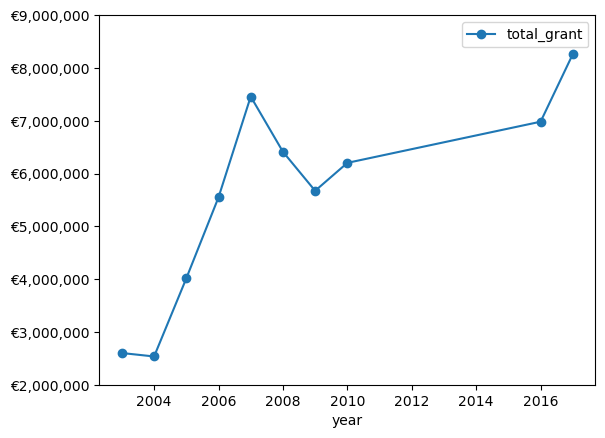

In [10]:
# Plot annual total funding result
ax = annual_total.plot(marker="o")

# grab ytick locations and reformat to make ytick labels
# (Code adapted from https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels)
ylocs, ylabels = plt.yticks()
ylabels_formatted = ["€{:,.0f}".format(x) for x in ylocs]
plt.yticks(ylocs, ylabels_formatted)
;

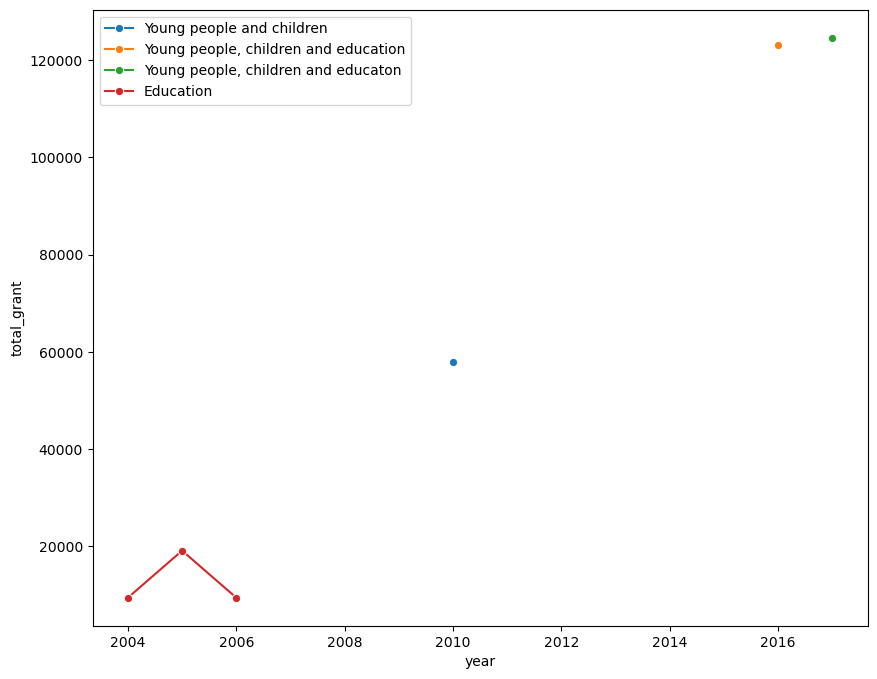

In [11]:
# Plot the grants awarded for a subset of artforms (not yet cleaned).
plt.figure(figsize=(10,8))

test_list_artforms = ['Young people and children',
    'Young people, children and education',
    'Young people, children and educaton',
    "Education"]

for artform in test_list_artforms:

    sns.lineplot(df_all_years[df_all_years["artform"]== artform],
                x="year", y="total_grant", marker="o",
            label = artform)


## To Do:  
- clean data, especially artform categorisation
- derive more data e.g per-capita, gender gap
- look at comparative data sources - Eurostat? Arts Council annual grant figures?